<a href="https://colab.research.google.com/github/sangsucki/TopicModeling/blob/main/%08%08%ED%9A%8C%EA%B7%80%EB%B6%84%EC%84%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 선형 회귀 분석



## 1. 질문(가설) : 중고차 가격에 영향을 가장 크게 미치는 것은 무엇일까?



In [ ]:
urlfile<-'https://raw.githubusercontent.com/sangsucki/TopicModeling/main/topicmodeling/0.%20Data/X_train.csv'
urlfile2<-'https://raw.githubusercontent.com/sangsucki/TopicModeling/main/topicmodeling/0.%20Data/y_train.csv'
df<-read.csv(urlfile)
df2<-read.csv(urlfile2)


In [ ]:
head(df)

,carID,brand,model,year,transmission,mileage,fuelType,tax,mpg,engineSize
,<int>,<chr>,<chr>,<int>,<chr>,<int>,<chr>,<dbl>,<dbl>,<dbl>
1,13207,hyundi,Santa Fe,2019,Semi-Auto,4223,Diesel,145,39.8,2.2
2,17314,vauxhall,GTC,2015,Manual,47870,Diesel,125,60.1,2.0
3,12342,audi,RS4,2019,Automatic,5151,Petrol,145,29.1,2.9
4,13426,vw,Scirocco,2016,Automatic,20423,Diesel,30,57.6,2.0
5,16004,skoda,Scala,2020,Semi-Auto,3569,Petrol,145,47.1,1.0
6,18964,merc,V Class,2019,Automatic,4170,Diesel,145,44.1,2.1


In [ ]:
df_total <- merge(df,df2,by="carID")

In [ ]:
colnames(df_total)

[1] "carID"        "brand"        "model"        "year"         "transmission"
 [6] "mileage"      "fuelType"     "tax"          "mpg"          "engineSize"  
[11] "price"

## 단순선형회귀

In [ ]:
options(scipen=0)

lm_mile <- lm(price ~ mileage , data = df_total)
summary(lm_mile)


Call:
lm(formula = price ~ mileage, data = df_total)

Residuals:
   Min     1Q Median     3Q    Max 
-24571  -9749  -3045   6205 114154 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  3.149e+04  2.923e+02  107.71   <2e-16 ***
mileage     -3.213e-01  8.369e-03  -38.39   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 14410 on 4958 degrees of freedom
Multiple R-squared:  0.2292,	Adjusted R-squared:  0.229 
F-statistic:  1474 on 1 and 4958 DF,  p-value: < 2.2e-16


In [ ]:
# options(scipen=999)
lm_mile <- lm(price ~ mileage , data = df_total)
summary(lm_mile)


Call:
lm(formula = price ~ mileage, data = df_total)

Residuals:
   Min     1Q Median     3Q    Max 
-24571  -9749  -3045   6205 114154 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  3.149e+04  2.923e+02  107.71   <2e-16 ***
mileage     -3.213e-01  8.369e-03  -38.39   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 14410 on 4958 degrees of freedom
Multiple R-squared:  0.2292,	Adjusted R-squared:  0.229 
F-statistic:  1474 on 1 and 4958 DF,  p-value: < 2.2e-16


In [ ]:
lm_mpg <- lm(price ~ engineSize , data = df_total)
summary(lm_mpg)


Call:
lm(formula = price ~ engineSize, data = df_total)

Residuals:
   Min     1Q Median     3Q    Max 
-53824  -7264  -2022   6135  92164 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  -4122.0      522.3  -7.893 3.61e-15 ***
engineSize   12988.3      230.4  56.361  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 12810 on 4958 degrees of freedom
Multiple R-squared:  0.3905,	Adjusted R-squared:  0.3904 
F-statistic:  3177 on 1 and 4958 DF,  p-value: < 2.2e-16


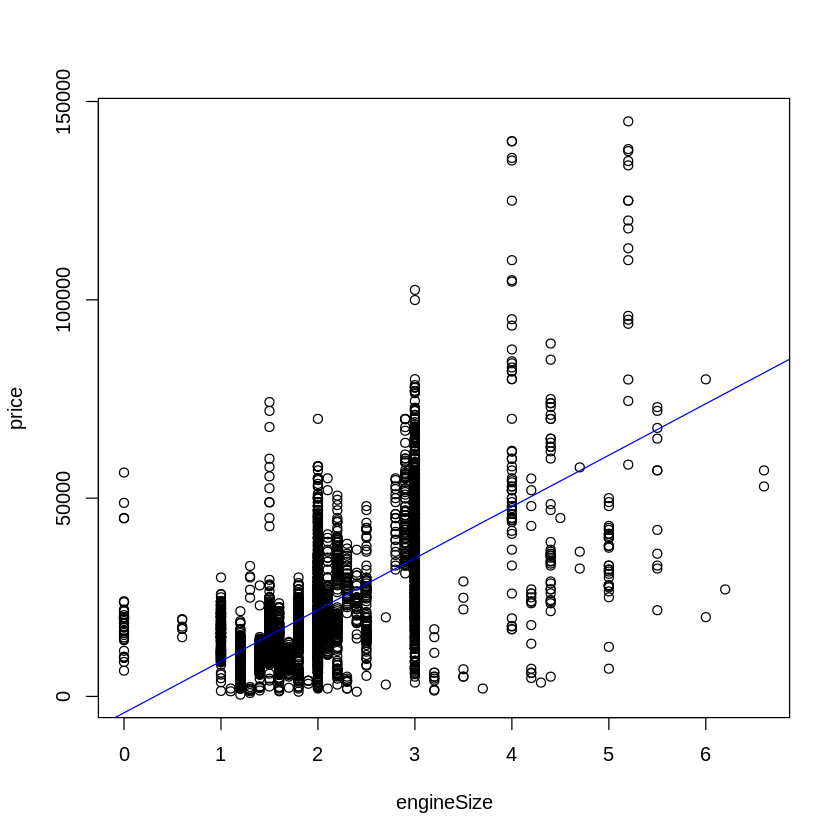

In [ ]:
plot(df_total$engineSize, df_total$price, xlab = "engineSize", ylab = "price")
abline(coef(lm_mpg), col = "blue")

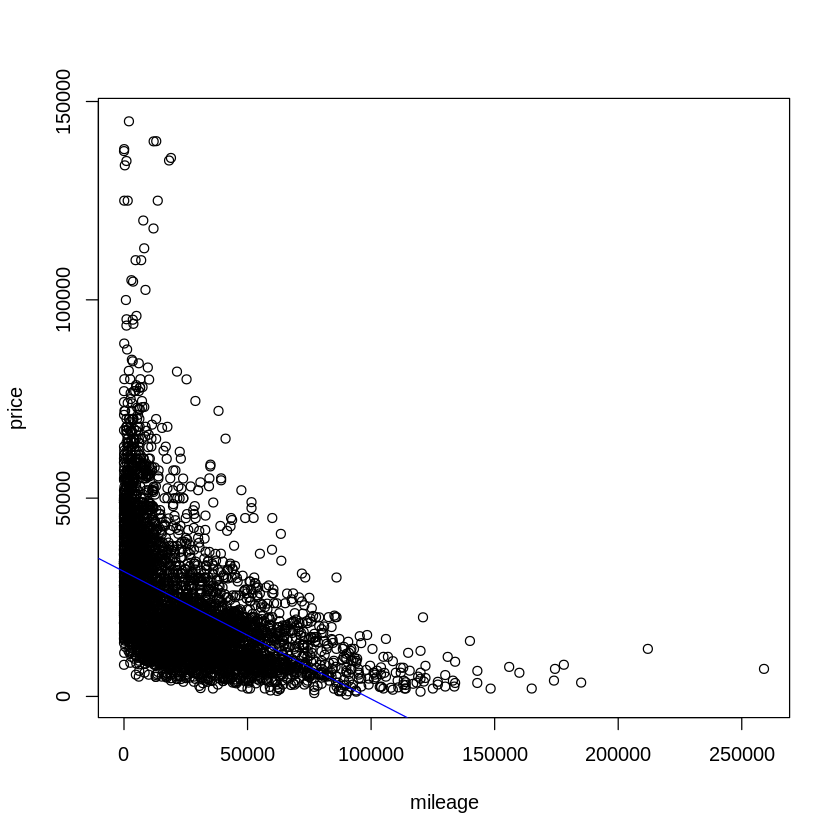

In [ ]:
plot(df_total$mileage, df_total$price, xlab = "mileage", ylab = "price")
abline(coef(lm_mile), col = "blue")

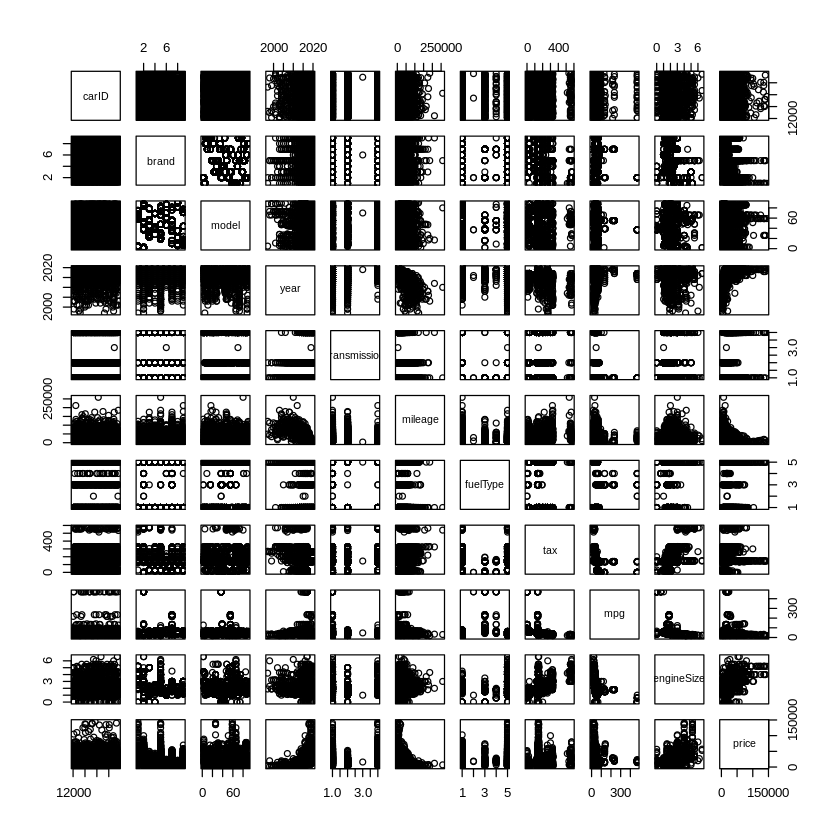

In [ ]:
plot(df_total)

In [ ]:
install.packages('corrplot')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
library(corrplot)

corrplot 0.92 loaded



In [ ]:
str(df_total)

'data.frame':	4960 obs. of  11 variables:
 $ carID       : int  12002 12003 12005 12006 12007 12008 12009 12010 12011 12012 ...
 $ brand       : chr  "hyundi" "vw" "toyota" "ford" ...
 $ model       : chr  " Santa Fe" " Arteon" " Verso" " Grand C-MAX" ...
 $ year        : int  2017 2019 2003 2018 2019 2016 2019 2019 2015 2020 ...
 $ transmission: chr  "Semi-Auto" "Automatic" "Automatic" "Manual" ...
 $ mileage     : int  32467 1555 104000 5113 9010 32853 1000 5 55000 50 ...
 $ fuelType    : chr  "Diesel" "Petrol" "Petrol" "Petrol" ...
 $ tax         : num  235 145 300 145 145 10 145 145 300 145 ...
 $ mpg         : num  42.8 40.4 34.5 47.9 34.9 64.2 34.5 38.7 37.2 23.9 ...
 $ engineSize  : num  2.2 1.5 1.8 1 3 1.8 3 2 2 5 ...
 $ price       : int  18991 22500 2395 14000 58700 22995 49991 27998 25995 48000 ...


In [ ]:
nums <- unlist(lapply(df_total, is.numeric))  
df_nums <- df_total[ , nums]



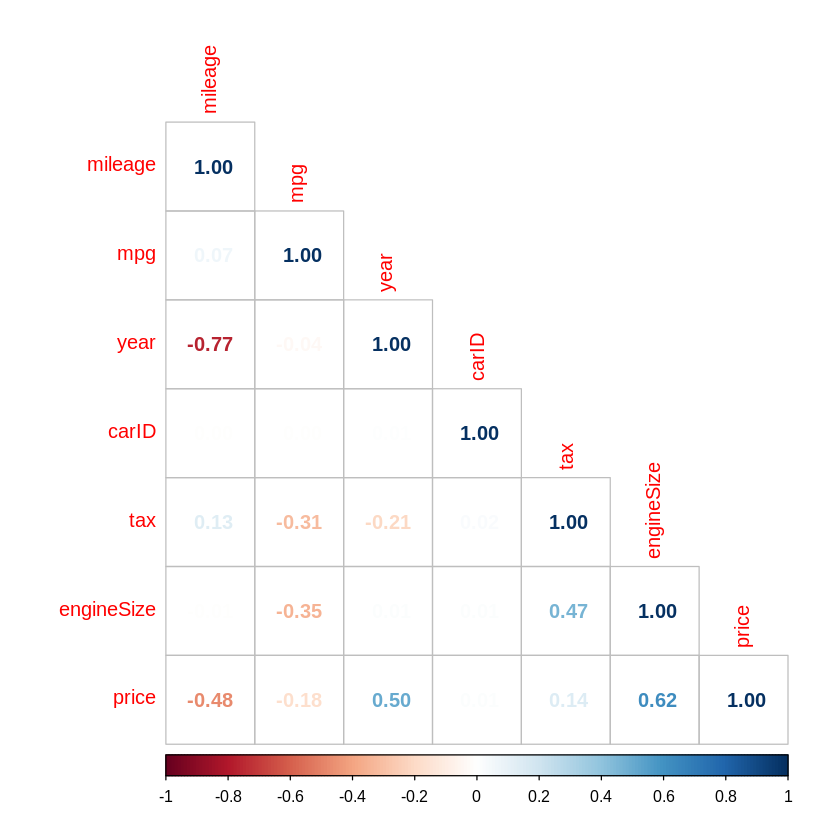

In [ ]:
corrplot(cor(df_nums),method="number",type="lower",order="hclust")




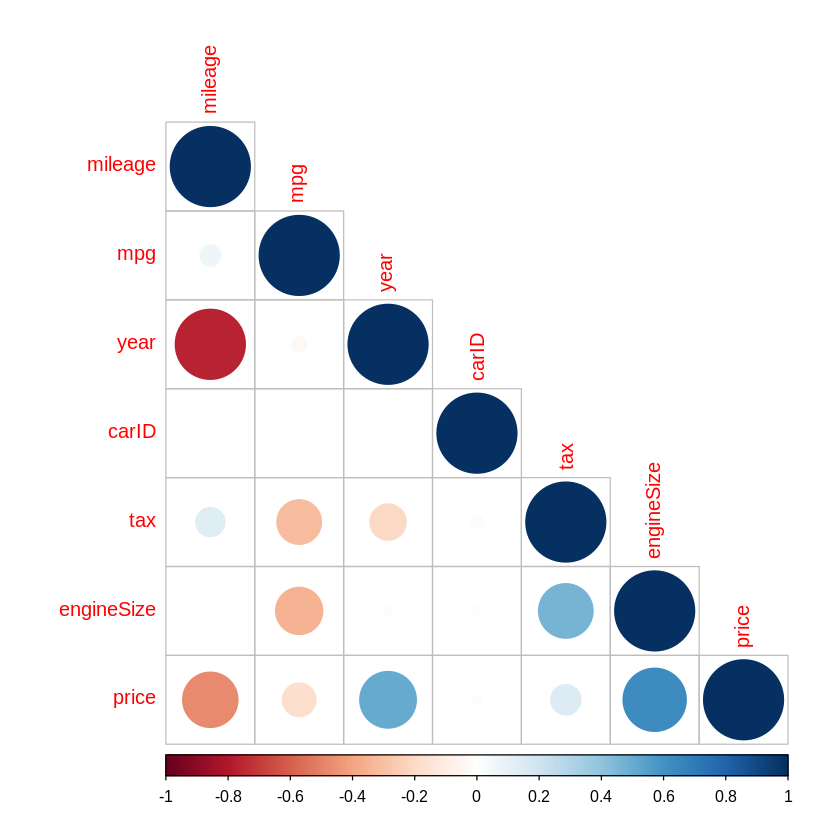

In [ ]:
corrplot(cor(df_nums),method="circle",type="lower",order="hclust")



### 모델 돌려보기

In [ ]:
lm_multi <- lm(price ~ engineSize + mileage + year + mpg + tax , data = df_total)
summary(lm_multi)


Call:
lm(formula = price ~ engineSize + mileage + year + mpg + tax, 
    data = df_total)

Residuals:
   Min     1Q Median     3Q    Max 
-36293  -5154  -1668   3277  87294 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -3.381e+06  1.509e+05 -22.401  < 2e-16 ***
engineSize   1.383e+04  2.011e+02  68.781  < 2e-16 ***
mileage     -1.650e-01  8.683e-03 -19.004  < 2e-16 ***
year         1.676e+03  7.476e+01  22.416  < 2e-16 ***
mpg          2.996e+01  4.130e+00   7.254 4.67e-13 ***
tax         -1.019e+01  1.951e+00  -5.222 1.84e-07 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 9540 on 4954 degrees of freedom
Multiple R-squared:  0.6622,	Adjusted R-squared:  0.6619 
F-statistic:  1942 on 5 and 4954 DF,  p-value: < 2.2e-16


In [ ]:
lm_prac <- lm(price ~ engineSize + mileage, data = df_total)
summary(lm_prac)


Call:
lm(formula = price ~ engineSize + mileage, data = df_total)

Residuals:
   Min     1Q Median     3Q    Max 
-53946  -5684  -1472   3586  88489 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)  3.965e+03  4.410e+02   8.991   <2e-16 ***
engineSize   1.292e+04  1.830e+02  70.633   <2e-16 ***
mileage     -3.186e-01  5.909e-03 -53.919   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 10170 on 4957 degrees of freedom
Multiple R-squared:  0.6158,	Adjusted R-squared:  0.6157 
F-statistic:  3973 on 2 and 4957 DF,  p-value: < 2.2e-16


In [ ]:
lm_step <- lm(price ~ ., data = df_total)

step(lm_step, direction='both')

Start:  AIC=85681.14
price ~ carID + brand + model + year + transmission + mileage + 
    fuelType + tax + mpg + engineSize


Step:  AIC=85681.14
price ~ carID + model + year + transmission + mileage + fuelType + 
    tax + mpg + engineSize

               Df  Sum of Sq        RSS   AIC
- carID         1 4.8886e+07 1.5128e+11 85681
<none>                       1.5123e+11 85681
- fuelType      4 2.2181e+09 1.5345e+11 85745
- transmission  3 2.2756e+09 1.5350e+11 85749
- mpg           1 4.0514e+09 1.5528e+11 85810
- tax           1 9.5507e+09 1.6078e+11 85983
- mileage       1 9.6872e+09 1.6091e+11 85987
- engineSize    1 1.3448e+10 1.6468e+11 86102
- year          1 2.6358e+10 1.7759e+11 86476
- model        89 2.6841e+11 4.1964e+11 90565

Step:  AIC=85680.75
price ~ model + year + transmission + mileage + fuelType + tax + 
    mpg + engineSize

               Df  Sum of Sq        RSS   AIC
<none>                       1.5128e+11 85681
+ carID         1 4.8886e+07 1.5123e+11 85681
- fue


Call:
lm(formula = price ~ model + year + transmission + mileage + 
    fuelType + tax + mpg + engineSize, data = df_total)

Coefficients:
                (Intercept)               model 7 Series  
                 -3.289e+06                    8.220e+03  
             model 8 Series                     model A7  
                  2.679e+04                    3.542e+03  
                   model A8                  model Agila  
                  6.882e+03                   -2.645e+03  
               model Amarok                 model Antara  
                  3.062e+03                   -1.575e+03  
               model Arteon                model Avensis  
                 -1.193e+01                   -3.754e+03  
               model Beetle                  model Caddy  
                 -2.185e+03                    2.319e+01  
           model Caddy Life        model Caddy Maxi Life  
                 -5.177e+03                   -4.906e+03  
           model California       

In [ ]:
lm_stepw <- lm(formula = price ~ model + year + transmission + mileage + 
    fuelType + tax + mpg + engineSize, data = df_total)
summary(lm_stepw)


Call:
lm(formula = price ~ model + year + transmission + mileage + 
    fuelType + tax + mpg + engineSize, data = df_total)

Residuals:
   Min     1Q Median     3Q    Max 
-34171  -2576   -484   1783  65395 

Coefficients:
                              Estimate Std. Error t value Pr(>|t|)    
(Intercept)                 -3.289e+06  1.139e+05 -28.872  < 2e-16 ***
model 7 Series               8.220e+03  9.414e+02   8.732  < 2e-16 ***
model 8 Series               2.679e+04  1.282e+03  20.902  < 2e-16 ***
model A7                     3.542e+03  9.204e+02   3.849 0.000120 ***
model A8                     6.882e+03  9.057e+02   7.598 3.58e-14 ***
model Agila                 -2.645e+03  1.618e+03  -1.634 0.102258    
model Amarok                 3.062e+03  9.685e+02   3.162 0.001577 ** 
model Antara                -1.575e+03  1.548e+03  -1.018 0.308897    
model Arteon                -1.193e+01  8.364e+02  -0.014 0.988620    
model Avensis               -3.754e+03  1.001e+03  -3.752 0.000178

# 회귀분석 4가지 진단방법

Warning message:
“not plotting observations with leverage one:
  4498”


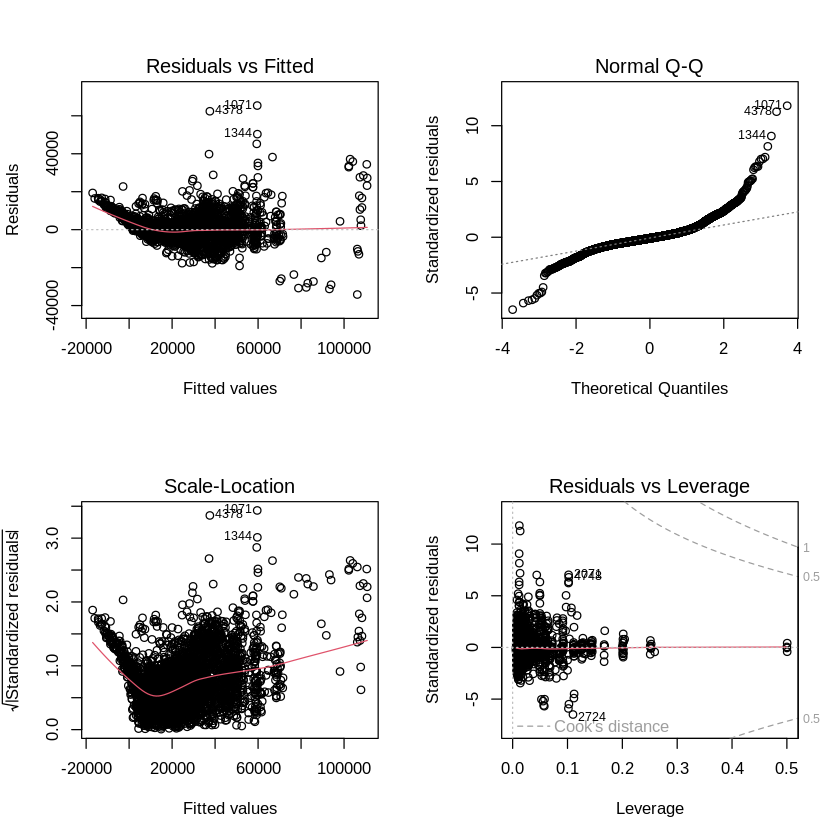

In [ ]:
par(mfrow = c(2, 2))
plot(lm_stepw)


In [ ]:
install.packages('car')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘numDeriv’, ‘SparseM’, ‘MatrixModels’, ‘sp’, ‘minqa’, ‘nloptr’, ‘Rcpp’, ‘RcppEigen’, ‘carData’, ‘abind’, ‘pbkrtest’, ‘quantreg’, ‘maptools’, ‘lme4’




In [ ]:
library(car)
car(lm_stepw)

Loading required package: carData



## 2. 질문(가설) : 퇴직에 영향을 가장 크게 미치는 것은 무엇일까? 


In [1]:
urlfile3 <- 'https://raw.githubusercontent.com/sangsucki/TopicModeling/main/topicmodeling/0.%20Data/hr_sample.csv'
df3 <- read.csv(urlfile3)


In [2]:
df3$Attrition[df3$Attrition == 'Yes'] <- 1  
df3$Attrition[df3$Attrition == 'No'] <- 0  
df3$Attrition=as.factor(df3$Attrition)


In [ ]:
head(df3)

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,⋯,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
,<int>,<chr>,<chr>,<chr>,<int>,<int>,<chr>,<int>,<int>,<chr>,⋯,<int>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,51,0,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,⋯,1,Y,11,8,0,1,6,1,0,0
2,31,1,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,⋯,0,Y,23,8,1,6,3,5,1,4
3,32,0,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,⋯,1,Y,15,8,3,5,2,5,0,3
4,38,0,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,⋯,3,Y,11,8,3,13,5,8,7,5
5,32,0,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,⋯,4,Y,12,8,2,9,2,6,0,4
6,46,0,Travel_Rarely,Research & Development,8,3,Life Sciences,1,6,Female,⋯,3,Y,13,8,0,28,5,7,7,7


In [ ]:
colnames(df3)

[1] "Age"                     "Attrition"              
 [3] "BusinessTravel"          "Department"             
 [5] "DistanceFromHome"        "Education"              
 [7] "EducationField"          "EmployeeCount"          
 [9] "EmployeeID"              "Gender"                 
[11] "JobLevel"                "JobRole"                
[13] "MaritalStatus"           "MonthlyIncome"          
[15] "NumCompaniesWorked"      "Over18"                 
[17] "PercentSalaryHike"       "StandardHours"          
[19] "StockOptionLevel"        "TotalWorkingYears"      
[21] "TrainingTimesLastYear"   "YearsAtCompany"         
[23] "YearsSinceLastPromotion" "YearsWithCurrManager"

In [18]:
glm_attr <- glm(Attrition ~ BusinessTravel + DistanceFromHome + Age + YearsSinceLastPromotion + NumCompaniesWorked, data = df3, family = "binomial")
summary(glm_attr)



Call:
glm(formula = Attrition ~ BusinessTravel + DistanceFromHome + 
    Age + YearsSinceLastPromotion + NumCompaniesWorked, family = "binomial", 
    data = df3)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.1730  -0.6361  -0.5092  -0.3570   2.5933  

Coefficients:
                                 Estimate Std. Error z value Pr(>|z|)    
(Intercept)                     -0.515221   0.250739  -2.055   0.0399 *  
BusinessTravelTravel_Frequently  1.410528   0.194485   7.253 4.09e-13 ***
BusinessTravelTravel_Rarely      0.752980   0.183113   4.112 3.92e-05 ***
DistanceFromHome                -0.002803   0.005290  -0.530   0.5962    
Age                             -0.065084   0.005663 -11.493  < 2e-16 ***
YearsSinceLastPromotion          0.014671   0.014604   1.005   0.3151    
NumCompaniesWorked               0.117547   0.016996   6.916 4.64e-12 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken

In [14]:
glm_attr2 <- glm(Attrition ~ BusinessTravel, data = df3, family = "binomial")
summary(glm_attr2)



Call:
glm(formula = Attrition ~ BusinessTravel, family = "binomial", 
    data = df3)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-0.7569  -0.5692  -0.5692  -0.4084   2.2475  

Coefficients:
                                Estimate Std. Error z value Pr(>|z|)    
(Intercept)                      -2.4423     0.1738 -14.056  < 2e-16 ***
BusinessTravelTravel_Frequently   1.3389     0.1914   6.996 2.63e-12 ***
BusinessTravelTravel_Rarely       0.7044     0.1808   3.895 9.83e-05 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 3895.7  on 4409  degrees of freedom
Residual deviance: 3824.5  on 4407  degrees of freedom
AIC: 3830.5

Number of Fisher Scoring iterations: 5


In [16]:
exp(coef(glm_attr2))

(Intercept) BusinessTravelTravel_Frequently 
                     0.08695652                      3.81490385 
    BusinessTravelTravel_Rarely 
                     2.02254791

In [ ]:
glm_attr_s <- glm(Attrition ~ BusinessTravel + Age + Department + DistanceFromHome + Education + Gender + JobRole + MaritalStatus + MonthlyIncome + NumCompaniesWorked + StandardHours + StockOptionLevel + TotalWorkingYears + YearsAtCompany + YearsSinceLastPromotion + YearsWithCurrManager, data = df3, family = "binomial")

In [ ]:
step(glm_attr_s, direction='both')

Start:  AIC=3402.95
Attrition ~ BusinessTravel + Age + Department + DistanceFromHome + 
    Education + Gender + JobRole + MaritalStatus + MonthlyIncome + 
    NumCompaniesWorked + StandardHours + StockOptionLevel + TotalWorkingYears + 
    YearsAtCompany + YearsSinceLastPromotion + YearsWithCurrManager


Step:  AIC=3402.95
Attrition ~ BusinessTravel + Age + Department + DistanceFromHome + 
    Education + Gender + JobRole + MaritalStatus + MonthlyIncome + 
    NumCompaniesWorked + StockOptionLevel + TotalWorkingYears + 
    YearsAtCompany + YearsSinceLastPromotion + YearsWithCurrManager

                          Df Deviance    AIC
- DistanceFromHome         1   3351.0 3401.0
- YearsAtCompany           1   3351.7 3401.7
- MonthlyIncome            1   3352.1 3402.1
- Gender                   1   3352.3 3402.3
<none>                         3350.9 3402.9
- StockOptionLevel         1   3353.0 3403.0
- Education                1   3353.8 3403.8
- JobRole                  8   3378.9 3414.9


Call:  glm(formula = Attrition ~ BusinessTravel + Age + Department + 
    Education + JobRole + MaritalStatus + NumCompaniesWorked + 
    StockOptionLevel + TotalWorkingYears + YearsSinceLastPromotion + 
    YearsWithCurrManager, family = "binomial", data = df3)

Coefficients:
                     (Intercept)   BusinessTravelTravel_Frequently  
                        -0.45232                           1.47252  
     BusinessTravelTravel_Rarely                               Age  
                         0.74964                          -0.03217  
DepartmentResearch & Development                   DepartmentSales  
                        -0.83947                          -0.96988  
                       Education            JobRoleHuman Resources  
                        -0.07532                          -0.11509  
    JobRoleLaboratory Technician                    JobRoleManager  
                         0.13735                          -0.23015  
   JobRoleManufacturing Directo

In [ ]:
glm_step <- glm(formula = Attrition ~ BusinessTravel + Age + Department + 
    Education + JobRole + MaritalStatus + NumCompaniesWorked + 
    StockOptionLevel + TotalWorkingYears + YearsSinceLastPromotion + 
    YearsWithCurrManager, family = "binomial", data = df3)

In [ ]:
summary(glm_step)


Call:
glm(formula = Attrition ~ BusinessTravel + Age + Department + 
    Education + JobRole + MaritalStatus + NumCompaniesWorked + 
    StockOptionLevel + TotalWorkingYears + YearsSinceLastPromotion + 
    YearsWithCurrManager, family = "binomial", data = df3)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.5133  -0.6095  -0.4314  -0.2481   3.3257  

Coefficients:
                                  Estimate Std. Error z value Pr(>|z|)    
(Intercept)                      -0.452320   0.393978  -1.148   0.2509    
BusinessTravelTravel_Frequently   1.472515   0.200420   7.347 2.03e-13 ***
BusinessTravelTravel_Rarely       0.749640   0.187838   3.991 6.58e-05 ***
Age                              -0.032174   0.006888  -4.671 3.00e-06 ***
DepartmentResearch & Development -0.839474   0.183364  -4.578 4.69e-06 ***
DepartmentSales                  -0.969878   0.192954  -5.026 5.00e-07 ***
Education                        -0.075322   0.043504  -1.731   0.0834 .  
JobRoleH

In [89]:
set.seed(100)

sample <- sample(c(TRUE, FALSE), nrow(df3), replace=TRUE, prob=c(0.7,0.3))
train <- df3[sample, ]
test <- df3[!sample, ]

In [90]:
model <- glm(Attrition ~ BusinessTravel + Age + Department + 
    Education + JobRole + MaritalStatus + NumCompaniesWorked + 
    StockOptionLevel + TotalWorkingYears + YearsSinceLastPromotion + 
    YearsWithCurrManager, family=binomial, data=train)


In [91]:
predict_prob <- predict(model, newdata = train, type = "response")

predict_vs <- ifelse(predict_prob > 0.5, 1, 0) #vs 클래스 예측된 값 구하기 


In [92]:
result <- data.frame(actual=train$Attrition, predicted=predict_vs, pred_prob=predict_prob) #결과 합치기

In [99]:
cm <- confusionMatrix(result$actual, result$predicted)
cm

,0,1
,<int>,<int>
0,2565,434
1,25,45


In [101]:
cm[1,1]

[1] 2565

In [102]:
accuracy = (cm[1,1]+cm[2,2]) / (cm[1,1]+cm[2,2] + cm[1,2] + cm[2,1])
accuracy

[1] 0.8504399

In [105]:
precision = cm[1,1] / (cm[1,1] + cm[2,1])
precision

[1] 0.9903475

In [106]:
recall = cm[1,1] / (cm[1,1] + cm[1,2])
recall

[1] 0.8552851

In [95]:
predict_prob2 <- predict(model, newdata = test, type = "response")
predict_vs2 <- ifelse(predict_prob2 > 0.5, 1, 0) #vs 클래스 예측된 값 구하기 
result2 <- data.frame(actual=test$Attrition, predicted=predict_vs2, pred_prob=predict_prob2) #결과 합치기

In [103]:
cm2 <- confusionMatrix(result2$actual, result2$predicted)
cm2

,0,1
,<int>,<int>
0,1079,210
1,8,16


In [104]:
accuracy2 = (cm2[1,1]+cm2[2,2]) / (cm2[1,1]+cm2[2,2] + cm2[1,2] + cm2[2,1])
accuracy2

[1] 0.833968